## Описание задачи

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

## Описание датасета

1 school — аббревиатура школы, в которой учится ученик  
2 sex — пол ученика ('F' - женский, 'M' - мужской)  
3 age — возраст ученика (от 15 до 22)  
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)  
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)  
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)  
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)  
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)  
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)  
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)  
15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)  
16 schoolsup — дополнительная образовательная поддержка (yes или no)  
17 famsup — семейная образовательная поддержка (yes или no)  
18 paid — дополнительные платные занятия по математике (yes или no)  
19 activities — дополнительные внеучебные занятия (yes или no)  
20 nursery — посещал детский сад (yes или no)  
21 higher — хочет получить высшее образование (yes или no)  
22 internet — наличие интернета дома (yes или no)  
23 romantic — в романтических отношениях (yes или no)  
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)  
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)  
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)  
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)  
28 absences — количество пропущенных занятий  
29 score — баллы по госэкзамену по математике  

## 1. Первичный осмотр данных

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [187]:
df = pd.read_csv('stud_math.csv')
display(df.head(10)) 
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

##### Удалим отсутствующий в описании столбец ("studytime, granular") и приведем названия столбцов в нижний регистр

In [188]:
for s in df:
    df.rename(columns={s: s.lower()}, inplace=True)
df.drop(['studytime, granular'], inplace=True, axis=1)
df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [189]:
df.describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


##### Первичный оcмотр данных показал, что датасет состоит из:

13 категориальных переменных: m_edu, f_edu, m_job, f_job, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health.  
13 бинарных переменных: school, sex, address, famsize, p_status, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic.  
3 количественных переменных: age, absences, score.  

## 2. Анализ и обработка данных в столбцах
### 2.1 Kатегориальные переменные
### medu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [190]:
display(pd.DataFrame(df.medu.value_counts()))
df.loc[:, ['medu']].info()

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


##### Из данных видно, что большинство матерей имеют высшее образование и около 60% всех матерей имеют хотя бы среднее срециальное образование. Всего в данных 3 пропуска (1%), заменим их на наиболее вероятное значение.

In [191]:
df['medu'].fillna(df.medu.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.medu.value_counts()))
df.loc[:, ['medu']].info()

,medu
4.0,134
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


### fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [192]:
display(pd.DataFrame(df.fedu.value_counts()))
df.loc[:, ['fedu']].info()

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


##### В данных есть выброс (40), которого нет в описании. Вероятнее всего это ошибка ввода и значение составляет 4.0. Также есть 24 пустых значения, что составлет 6% от данных. В данном случае заменим пропуски на самое популярное значение.

In [193]:
df.loc[df['fedu'] == 40,'fedu'] = 4.0
df['fedu'].fillna(df.fedu.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.fedu.value_counts()))
df.loc[:, ['fedu']].info()

,fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


### mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  

In [194]:
display(pd.DataFrame(df.mjob.value_counts()))
df.loc[:, ['mjob']].info()

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данных есть 19 пустых значений, что составлет 5% от данных. Категория "other" имеет наибольшее количество значений - 35%. В данном случае заменим пропуски на самое популярное значение.

In [195]:
df['mjob'].fillna(df.mjob.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.mjob.value_counts()))
df.loc[:, ['mjob']].info()

,mjob
other,152
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [196]:
display(pd.DataFrame(df.fjob.value_counts()))
df.loc[:, ['fjob']].info()

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данных есть 36 пустых значений, что составлет 9% от данных. Категория "other" имеет наибольшее количество значений - 55%. В данном случае заменим пропуски на самое популярное значение.

In [197]:
df['fjob'].fillna(df.fjob.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.fjob.value_counts()))
df.loc[:, ['fjob']].info()

,fjob
other,233
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [198]:
display(pd.DataFrame(df.reason.value_counts()))
df.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### Наиболее популярной причиной выбора школы является образовательная программа. Одинаковые по популярности причины, которые занимают второе место - близость к дому и репутация школы. В данных есть 17 пустых значений, что составлет 4% от данных. В данном случае заменим пропуски на самое популярное значение.

In [199]:
df['reason'].fillna(df.reason.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.reason.value_counts()))
df.loc[:, ['reason']].info()

,reason
course,154
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое) ¶

In [200]:
display(pd.DataFrame(df.guardian.value_counts()))
df.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В большинсве случаев в роли опекуна выступает мать - 69%.  В данных есть 31 пустых значений, что составлет 8% от данных и не является критичным. В данном случае заменим пропуски на самое популярное значение.

In [201]:
df['guardian'].fillna(df.guardian.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.guardian.value_counts()))
df.loc[:, ['guardian']].info()

,guardian
mother,281
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [202]:
display(pd.DataFrame(df.traveltime.value_counts()))
df.loc[:, ['traveltime']].info()

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


##### В большинсве случаев дорога до школы занимает у учеников не больше 15 минут (66%).  В данных есть 28 пустых значений, что составлет 7% от данных и не является критичным. В данном случае заменим пропуски на самое популярное значение.

In [203]:
df['traveltime'].fillna(df.traveltime.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.traveltime.value_counts()))
df.loc[:, ['traveltime']].info()

,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


### studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [204]:
display(pd.DataFrame(df.studytime.value_counts()))
df.loc[:, ['studytime']].info()

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


##### В большинсве случаев учеба занимет не больше 2-х часов в неделю, что составляет 50% от общего числа.  В данных есть 7 пустых значений, что составлет 2% от данных и не является критичным. В данном случае заменим пропуски на самое популярное значение.

In [205]:
df['studytime'].fillna(df.studytime.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.studytime.value_counts()))
df.loc[:, ['studytime']].info()

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


### failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0) ¶f

In [206]:
display(pd.DataFrame(df.failures.value_counts()))
df.loc[:, ['failures']].info()

,failures
0.0,293
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


##### Как видно из данных, подавляющее большинсво учеников не имеют внеучебных задач (79%). В данных есть 22 пустых значения, что составлет 6% от данных и не является критичным. В данном случае заменим пропуски на самое популярное значение.

In [207]:
df['failures'].fillna(df.failures.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.failures.value_counts()))
df.loc[:, ['failures']].info()

,failures
0.0,315
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


### famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [208]:
display(pd.DataFrame(df.famrel.value_counts()))
df.loc[:, ['famrel']].info()

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


##### Большинсво учеников имеют очень хорошие семейные отношения. В данных есть выброс (-1.0), которого нет в описании. Вероятнее всего это ошибка ввода и значение составляет 1.0. Также есть 27 пустых значения, что составлет 7% от данных. В данном случае заменим пропуски на самое популярное значение.

In [209]:
df.loc[df['famrel'] == -1,'famrel'] = 1
df['famrel'].fillna(df.famrel.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.famrel.value_counts()))
df.loc[:, ['famrel']].info()

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


### freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [210]:
display(pd.DataFrame(df.freetime.value_counts()))
df.loc[:, ['freetime']].info()

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


##### Большинсво учеников имеют достаточное количество свободного времени - 40%. Также есть 11 пустых значения, что составлет 3% от данных. Заменим пропуски на самое популярное значение.

In [211]:
df['freetime'].fillna(df.freetime.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.freetime.value_counts()))
df.loc[:, ['freetime']].info()

,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


### goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [212]:
display(pd.DataFrame(df.goout.value_counts()))
df.loc[:, ['goout']].info()

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


##### Большинсво учеников имеют достаточно времени для проведения с друзьями. Также есть 8 пустых значения, что составлет 2% от данных. Заменим пропуски на самое популярное значение.

In [213]:
df['goout'].fillna(df.goout.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.goout.value_counts()))
df.loc[:, ['goout']].info()

,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


### health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [214]:
display(pd.DataFrame(df.health.value_counts()))
df.loc[:, ['health']].info()

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


##### Большинсво учеников не имеет проблем со здоровем. Большинсво имеют очень хорошее (36%), среднее (23%) и хорошее (17%) состояние здоровья. Также есть 15 пустых значения, что составлет 4% от данных. Заменим пропуски на самое популярное значение.

In [215]:
df['health'].fillna(df.health.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.health.value_counts()))
df.loc[:, ['health']].info()

,health
5.0,153
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


### 2.1 Бинарные переменные
### school — аббревиатура школы, в которой учится ученик

In [216]:
display(pd.DataFrame(df.school.value_counts()))
df.loc[:, ['school']].info()

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данном столбце всего 2 уникальных значения. Большинсво учеников учится в школе GP (88%). Данные без пропусков.

### sex — пол ученика ('F' - женский, 'M' - мужской)

In [217]:
display(pd.DataFrame(df.sex.value_counts()))
df.loc[:, ['sex']].info()

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данном столбце всего 2 уникальных значения. Количкство мальчиков и девочек в школе примерно одинаково. Данные без пропусков.

### address — тип адреса ученика ('U' - городской, 'R' - за городом)

In [218]:
display(pd.DataFrame(df.address.value_counts()))
df.loc[:, ['address']].info()

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данном столбце всего 2 уникальных значения. Большинсво учеников живут в городе. Данные имеют проруски - 17 пропусков или 4%. Заполним пропуски наиболле популярным значением.

In [219]:
df['address'].fillna(df.address.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.address.value_counts()))
df.loc[:, ['address']].info()

,address
U,312
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### famsize — размер семьи ('LE3' <= 3, 'GT3' >3)

In [220]:
display(pd.DataFrame(df.famsize.value_counts()))
df.loc[:, ['famsize']].info()

,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данном столбце всего 2 уникальных значения. Размер семьи большинсва учеников не привышает 3-х человек. Данные имеют проруски - 27 пропусков или 7%. Заполним пропуски наиболле популярным значением.

In [221]:
df['famsize'].fillna(df.famsize.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.famsize.value_counts()))
df.loc[:, ['famsize']].info()

,famsize
GT3,288
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [222]:
display(pd.DataFrame(df.pstatus.value_counts()))
df.loc[:, ['pstatus']].info()

,pstatus
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данном столбце всего 2 уникальных значения. Большинство родителей учеников живут вместе - 90%. Данные имеют пропуски - 45 пропусков или 11%, что нельзя назвать незначительным количеством. Заменим пропуски наиболее вероятным значением.

In [223]:
df['pstatus'].fillna(df.pstatus.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.pstatus.value_counts()))
df.loc[:, ['pstatus']].info()

,pstatus
T,359
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### schoolsup — дополнительная образовательная поддержка (yes или no)

In [224]:
display(pd.DataFrame(df.schoolsup.value_counts()))
df.loc[:, ['schoolsup']].info()

,schoolsup
no,335
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данном столбце всего 2 уникальных значения. Большинство учеников не имеют дополнительной образовательной поддержки - 87%. Данные имеют незначительные пропуски - 9 пропусков или 2%. Заменим пропуски наиболее вероятным значением.

In [225]:
df['schoolsup'].fillna(df.schoolsup.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.schoolsup.value_counts()))
df.loc[:, ['schoolsup']].info()

,schoolsup
no,344
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### famsup — семейная образовательная поддержка (yes или no)

In [226]:
display(pd.DataFrame(df.famsup.value_counts()))
df.loc[:, ['famsup']].info()

,famsup
yes,219
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данном столбце всего 2 уникальных значения. Большинство учеников имеют семейную образовательную поддержку - 61%. Данные имеют значительные пропуски - 39 пропусков или 10%. Заменим пропуски наиболее вероятным значением.

In [227]:
df['famsup'].fillna(df.famsup.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.famsup.value_counts()))
df.loc[:, ['famsup']].info()

,famsup
yes,258
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### paid — дополнительные платные занятия по математике (yes или no)

In [228]:
display(pd.DataFrame(df.paid.value_counts()))
df.loc[:, ['paid']].info()

,paid
no,200
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данном столбце всего 2 уникальных значения. Примерно половина учеников посещает платные занятия по математике. Данные имеют значительные пропуски - 40 пропусков или 10%. Заменим пропуски наиболее вероятным значением.

In [229]:
df['paid'].fillna(df.paid.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.paid.value_counts()))
df.loc[:, ['paid']].info()

,paid
no,240
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### activities — дополнительные внеучебные занятия (yes или no)

In [230]:
display(pd.DataFrame(df.activities.value_counts()))
df.loc[:, ['activities']].info()

,activities
yes,195
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данном столбце всего 2 уникальных значения. Примерно половина учеников посещает дополнительные внеучебные занятия. Данные имеют незначительные пропуски - 14 пропусков или 4%. Заменим пропуски наиболее вероятным значением.

In [231]:
df['activities'].fillna(df.activities.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.activities.value_counts()))
df.loc[:, ['activities']].info()

,activities
yes,209
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### nursery — посещал детский сад (yes или no)

In [232]:
display(pd.DataFrame(df.nursery.value_counts()))
df.loc[:, ['nursery']].info()

,nursery
yes,300
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данном столбце всего 2 уникальных значения. Значительное большинство учеников посещало детский сад - 79%. Данные имеют незначительные пропуски - 16 пропусков или 4%. Заменим пропуски наиболее вероятным значением.

In [233]:
df['nursery'].fillna(df.nursery.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.nursery.value_counts()))
df.loc[:, ['nursery']].info()

,nursery
yes,316
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### higher — хочет получить высшее образование (yes или no)

In [234]:
display(pd.DataFrame(df.higher.value_counts()))
df.loc[:, ['higher']].info()

,higher
yes,356
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данном столбце всего 2 уникальных значения. Практически все ученики собираются в будущем получить высшее образование - 95%. Данные имеют незначительные пропуски - 20 пропусков или 5%. Заменим пропуски наиболее вероятным значением.

In [235]:
df['higher'].fillna(df.higher.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.higher.value_counts()))
df.loc[:, ['higher']].info()

,higher
yes,376
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### internet — наличие интернета дома (yes или no)

In [236]:
display(pd.DataFrame(df.internet.value_counts()))
df.loc[:, ['internet']].info()

,internet
yes,305
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данном столбце всего 2 уникальных значения. У большинсва учеников есть доступ в интернет - 85%. Данные имеют  пропуски - 34 пропусков или 9%. Заменим пропуски наиболее вероятным значением.

In [237]:
df['internet'].fillna(df.internet.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.internet.value_counts()))
df.loc[:, ['internet']].info()

,internet
yes,339
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### romantic — в романтических отношениях (yes или no)

In [238]:
display(pd.DataFrame(df.romantic.value_counts()))
df.loc[:, ['romantic']].info()

,romantic
no,240
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


##### В данном столбце всего 2 уникальных значения. Многие ученики состоят в романтических отнощениях - 66%. Данные имеют  пропуски - 31 пропусков или 8%. Заменим пропуски наиболее вероятным значением.

In [239]:
df['romantic'].fillna(df.romantic.value_counts().index[0], inplace=True)
display(pd.DataFrame(df.romantic.value_counts()))
df.loc[:, ['romantic']].info()

,romantic
no,271
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### 2.3 Количественные переменные
### age — возраст ученика (от 15 до 22)

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

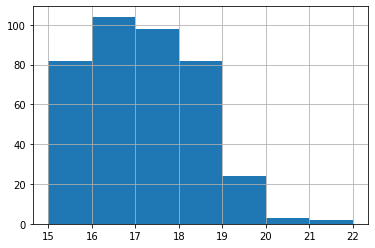

In [240]:
df.age.hist(bins = 7)
df.age.describe()

##### Максимальное и минимальное значение совпалает с границами интервала, указанными в условиях анализа, поэтому можно сказать что выбросов нету. Пропусков нет.

### absences — количество пропущенных занятий

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

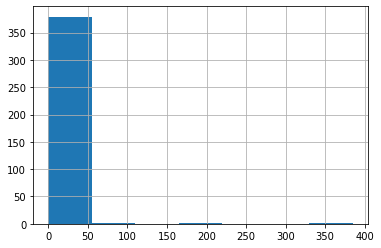

In [241]:
df.absences.hist(bins = 7)
df.absences.value_counts()

In [242]:
df.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

##### Данные имеют два выброса - 385 и 212, поэтому удалим их из датасета.  Остальные высокие значения будем считать верными, предполагая, что ученики могут длительно болеть или прогуливать занятия. В данных имеются 12 пустых значений или 3%. Заменим пустые значения на медиану.

In [243]:
df['absences'] = df['absences'].apply(lambda x: 0 if x >= 212 else x)
df['absences'] = df['absences'].fillna(df['absences'].median())

In [244]:
df.absences.describe()

count    395.000000
mean       5.668354
std        7.959535
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

### score — баллы по госэкзамену по математике

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

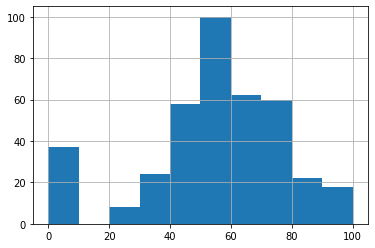

In [245]:
df.score.hist()
df.score.describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


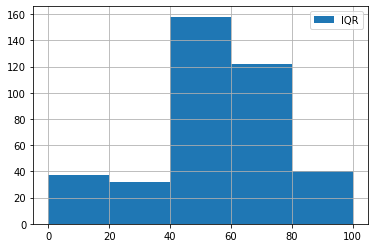

In [246]:
median = df.score.median()
IQR = df.score.quantile(0.75) - df.score.quantile(0.25)
perc25 = df.score.quantile(0.25)
perc75 = df.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
df.score.loc[df.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 100), label = 'IQR')
plt.legend();

##### Для фильтрации выбросов мы применили формулу интерквартильного расстояния. Можно заметить, что распределение без нулевых оценок учеников стремится к нормальному. Предположим, что ученики набравшие 0 баллов не были допущены или не сдавали экзамен. Воспользовавшись формулой и отбросив нулевые результаты мы получаем распределение похожее на нормальное. Также данные имеют 6 пустых значений или 1%. Так как количество попусков незначительно, заменим их на медианное значение.

In [247]:
df['score'].fillna(df.score.median())
df = df.loc[df.score > 0]

## 3. Корреляционный анализ количественных переменных

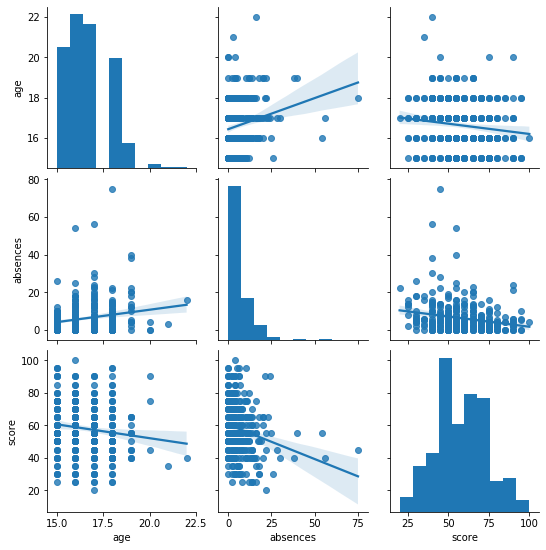

In [248]:
sns.pairplot(df[['age', 'absences', 'score']], kind = 'reg')

In [249]:
df[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.201550,-0.131542
absences,0.201550,1.000000,-0.214905
score,-0.131542,-0.214905,1.000000


##### На основе корреляционного анализа количественных переменных можно сделать вывод о том, что наблюдается отрицательная взаимосвязь между оценкой по математике и количеством пропущенных занятий. Также наблюдается слабая отрицательная взаимосвязь между оценкой и возрастом ученика. Также между собой коррелируют переменные age и absences.

## 4. Анализ номинативных переменных
##### Проанализируем различаются ли распределения оценок в зависимости от значения номинативных переменных:

In [250]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

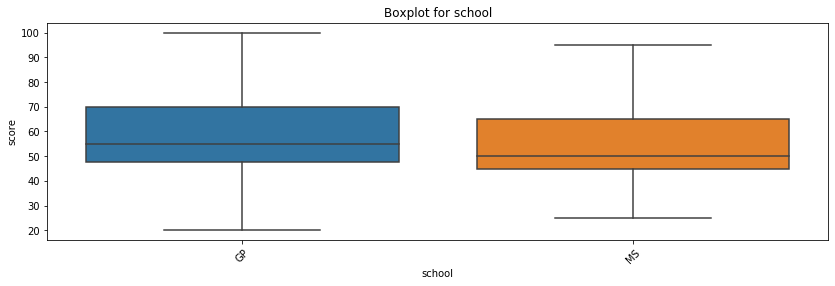

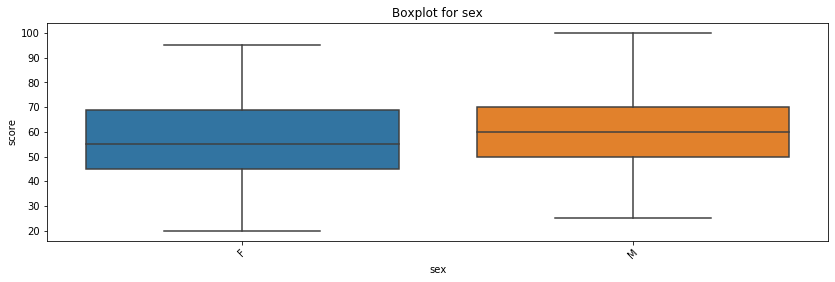

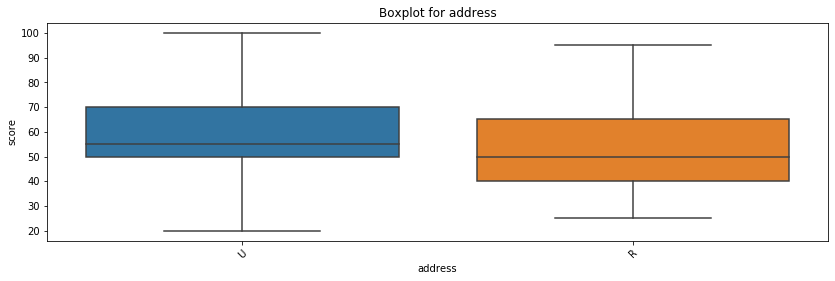

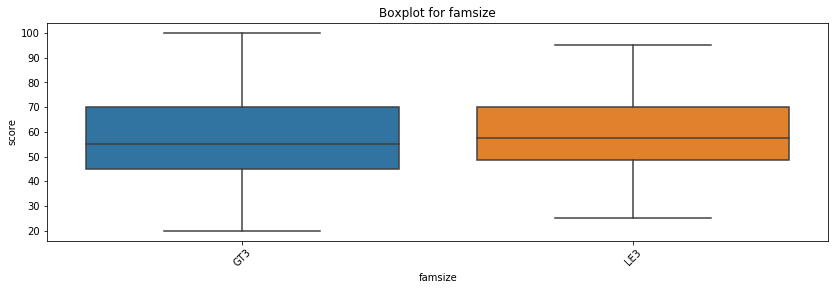

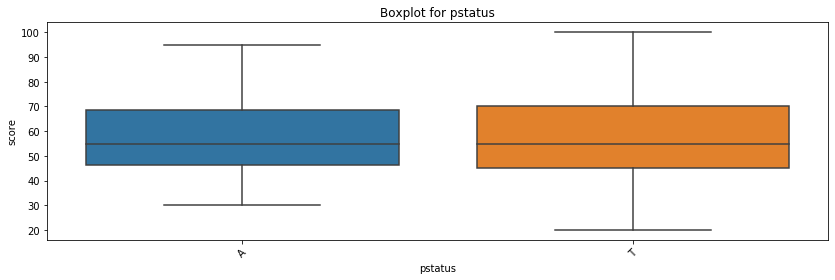

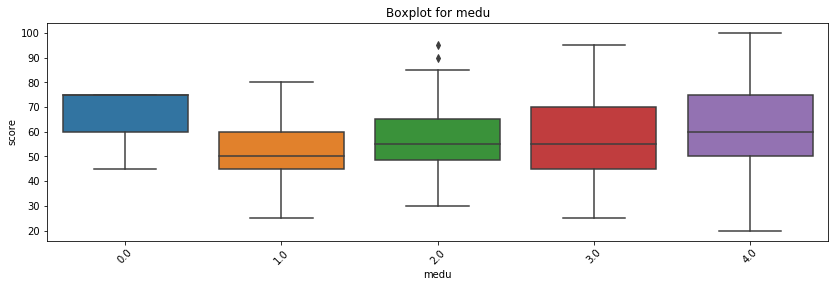

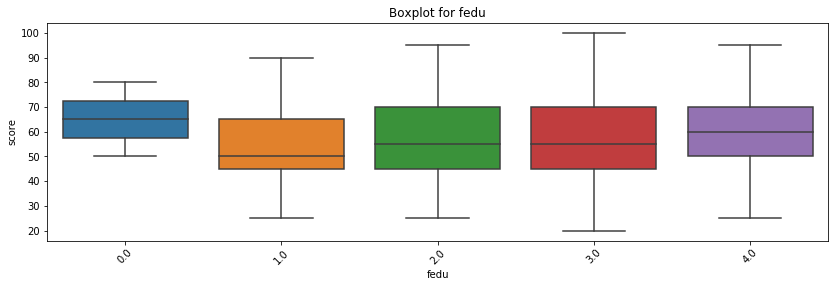

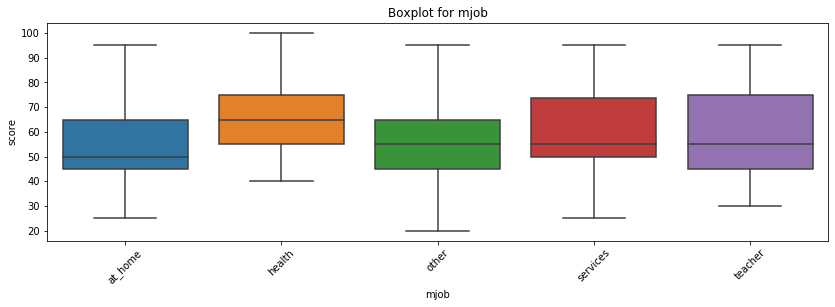

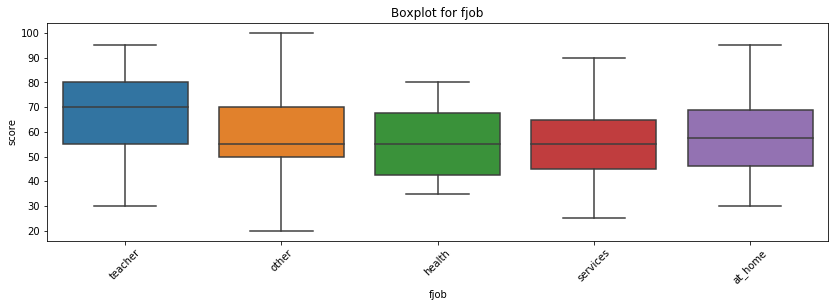

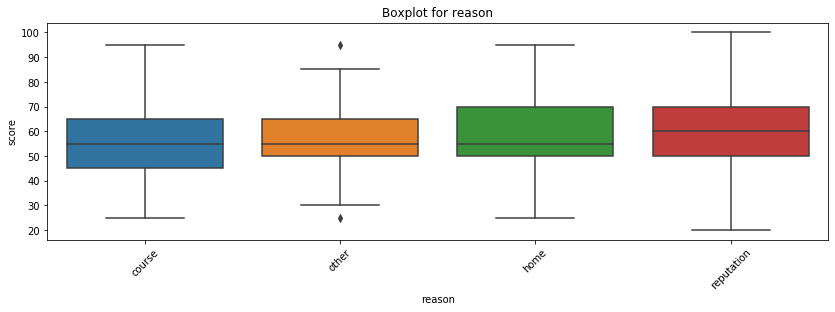

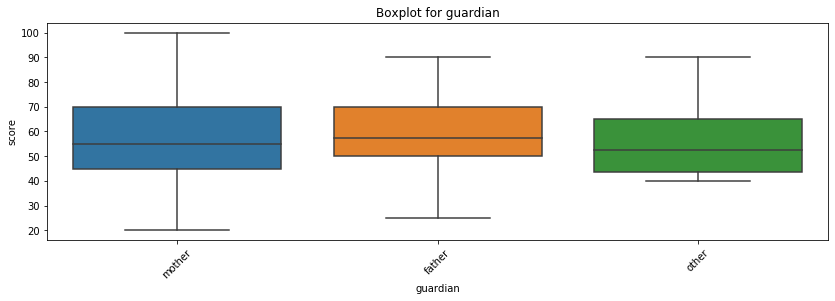

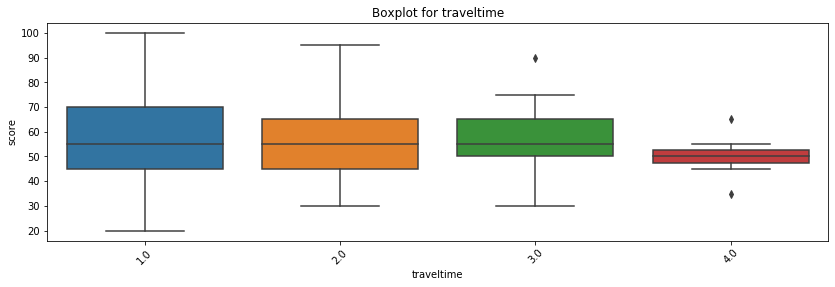

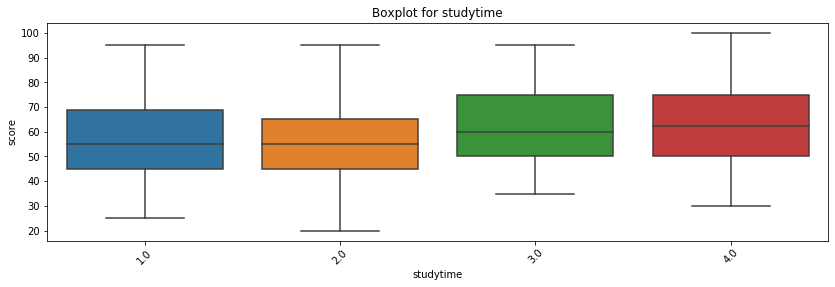

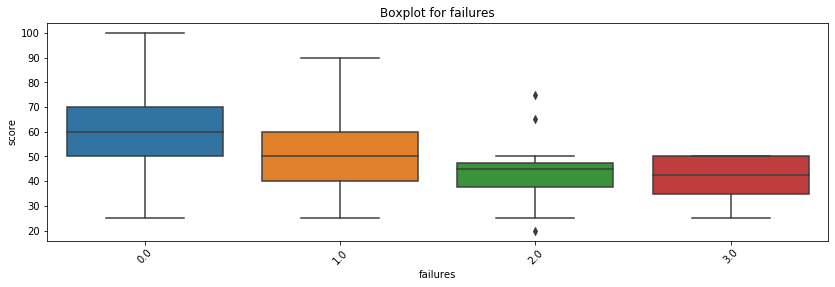

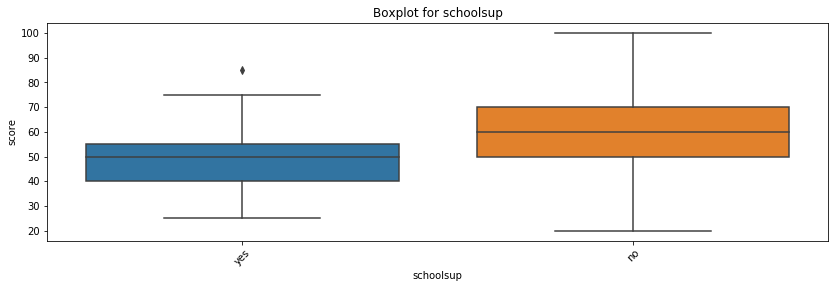

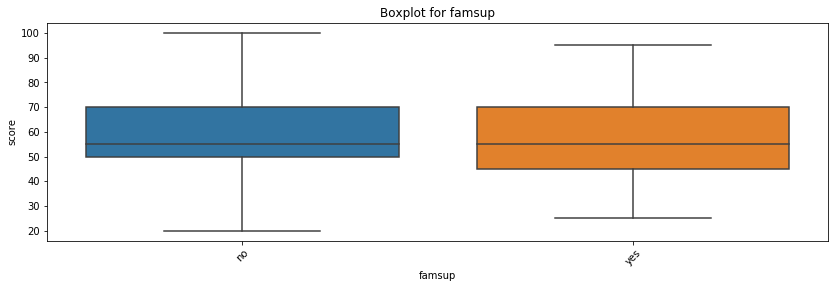

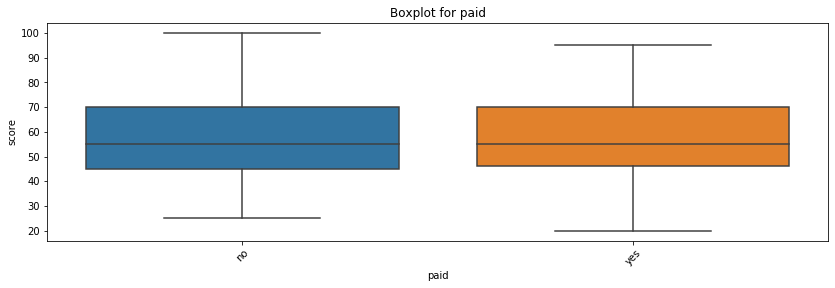

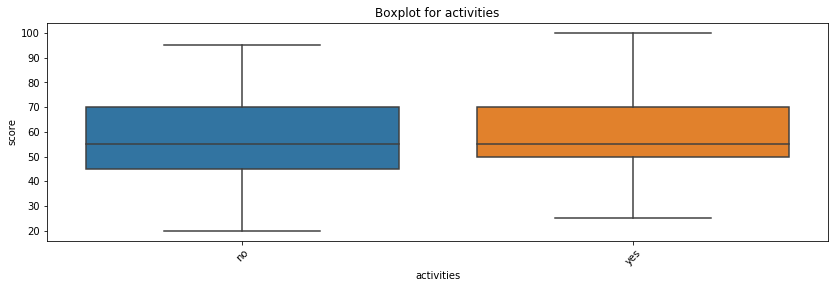

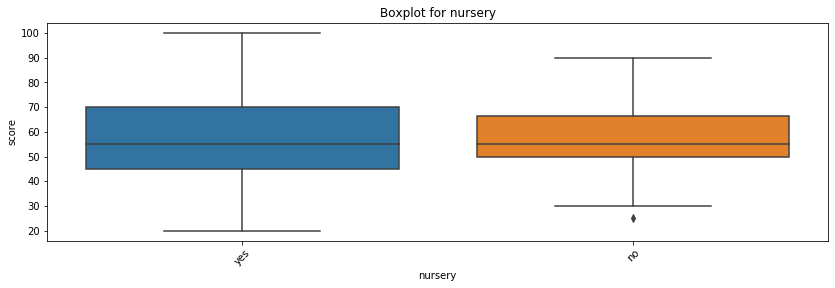

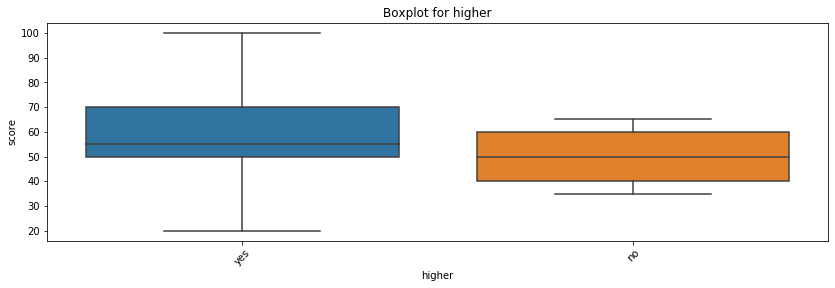

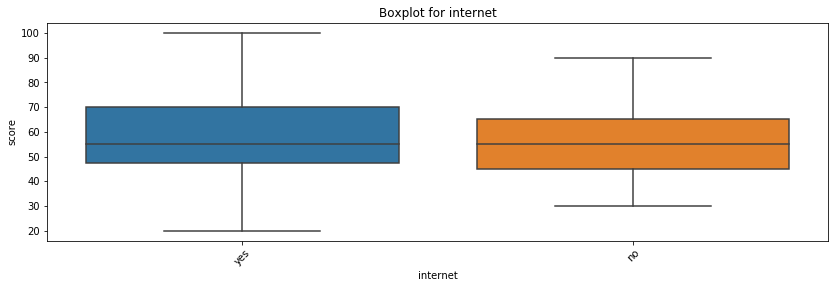

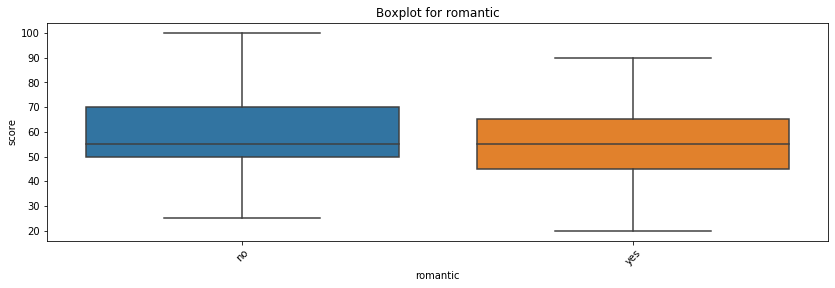

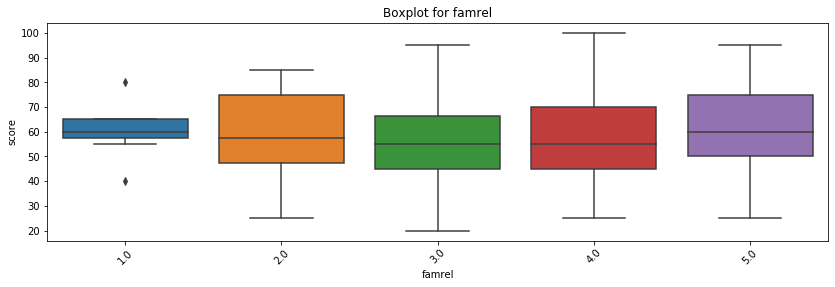

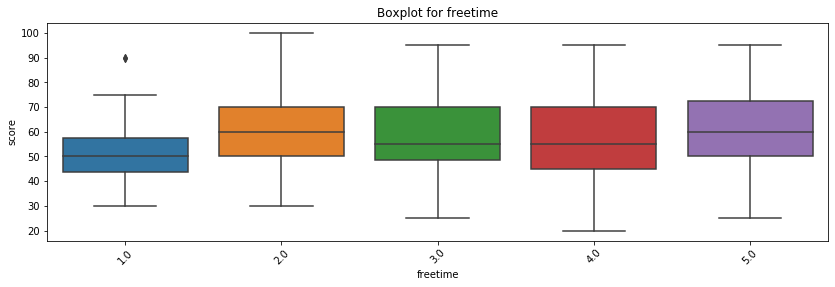

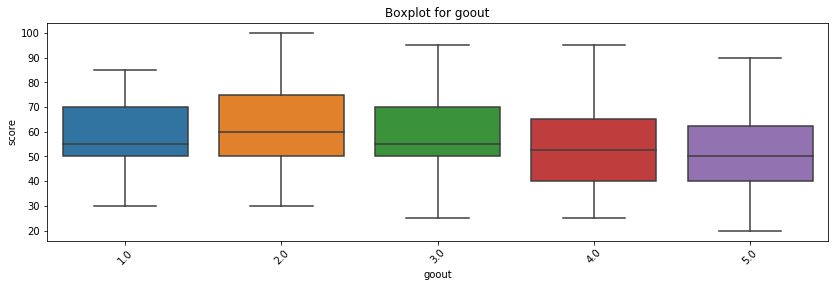

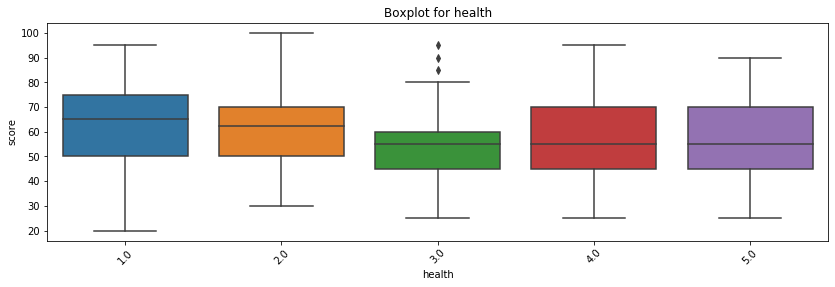

In [251]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu',
       'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health']:
    get_boxplot(col)

##### Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по различным параметрам неразличимы.

In [252]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [253]:
for col in ['school', 'sex', 'address', 'famsize', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 
            'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'activities', 
            'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки fjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


##### Оценим корреляцию итоговых переменных с помощью тепловой карты:

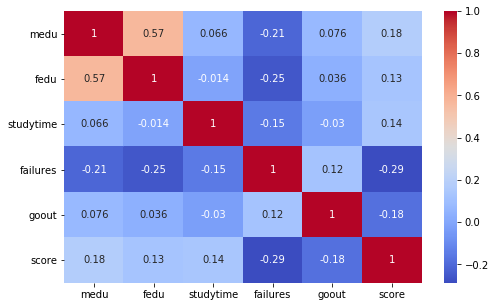

In [254]:
correlation = df[['medu', 'fedu','studytime', 'failures', 'goout', 'score']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

##### Таким образом важные переменные, которые, возможно, оказывают влияние на оценку по матиматике, это: address, medu, mjob, studytime, failures, schoolsup, goout. Как видно из тепловой карты переменные medu и fedu коррелируюи между собой, следовательно для дальнейшего анализа можно оставить только переменную medu.

## 5. Выводы

##### В результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:
+ В данных достаточно мало пустых значений (для большинства столбцов не более 10% от величины датасета), только столбец pstatus был заполнен в меньшем количестве случаев.  
+ Выбросы найдены только в столбцах трех столбцах: fedu, famrel и absences. Это позволяет сделать вывод о том, что данные достаточно чистые.  
+ Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, absences, address, medu, mjob, studytime, failures, schoolsup, goout.  

##### На основании проанализированных данных можно выдвинуть следующие гипотезы:

+ Отрицательная корреляция по парамметру age говорит о том, что чем моложе ученик, тем лучше у него оценки по математике. Возможно это связвно с тем, что взрослые ученики от 19 до 22 лет, которые есть в выборке оставались в школе на дополнительный год в связи с неуспеваемостью. Для анализв этой теории не хватает данных в какой стране проводили исследование и каков возраст ученика при окончании школы. Возможно также, что с чем выше возраст, тем более сложная школьная программа и следовательно школьники хуже справляются с госэкзаменом по матиматике.
+ Отрицательная корреляция по парамметру absences говорит о том, что чем больше пропусков у ученика, тем хуже оценки по математике, что имеет место быть, так как вероятнее всего ученик не полностью усваивает школьный материал и имеет пробелы в знаниях.
+ Положительная корреляция по парамметру address говорит о том, что городские ученики имеют лучшие балы по математике. Возможно это связано с более развитой городской инфраструктурой и наличием больших возможностей.
+ Положительная корреляция по парамметру medu и fedu, говорит о том что у более образованных родителей дети сдают лучше экзамен по математике. Причем параметра medu и fedu хорошо коррелируют между собой, что может говорить о том, что схожий уровень образования является важным фактором для создания семьи. 
+ Положительная корреляция по парамметру mjob говорит о том, что ученики у которых матери работают в сфере медицины, наиболее большие баллы по матиматике. 
+ Положительная корреляция по парамметру studytime говорит о том, что чем больше времени ученик тратит на учебу помимо школы, тем лучше у него оценки по математике.
+ Отрицательная корреляция по парамметру failures говорит о том, что те у кого нет внеучебных задач, получают набольшее количество баллов. Также чем меньше внеучбных задач, тем лучше былв по математике. 
+ Положительная корреляция по парамметру schoolsup говорит о том, что ученики у которых нет дополнительной образовательной поддержки лучше сдают экзамен. Это может быть связано с тем, что у этих учеников хорошая успеваемость и следовательно у них нет необходимости в дополнительной образовательной поддержке.
+ Отрицательная корреляция по парамметру goout говорит о том, что чем меньше ученик проводит времени с друзьями, тем лучше у него оценки по математике.

##### По итогу проведенных работ получен полностью подготовленный числовой датасет.